In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 251 variables, 277 constraints
 ! TimeLimit            = 15
 ! LogPeriod            = 10000
 ! SearchType           = Restart
 ! Initial process time : 0.02s (0.02s extraction + 0.00s propagation)
 !  . Log search space  : 1094.5 (before), 1094.5 (after)
 !  . Memory usage      : 2.0 MB (before), 2.0 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        251                 -
 + New bound is 123.0999
                        0        148    1   F        -
 + New bound is 133.0892
 *      606.1000       25  0.07s        1      (gap is 78.04%)
 I Used: 10
 *      523.3000      203  0.07s        1      (gap is 74.57%)
 I Used: 9
 *      522.1000      995  0.07s        6      (gap is 74.51%)
 I Used: 7
 *      501.

NameError: name 'data_model' is not defined

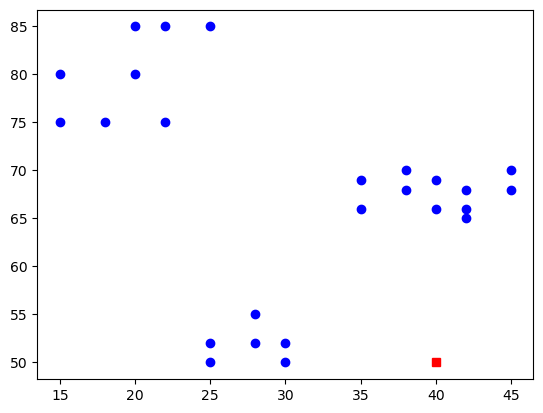

In [8]:
from cvrptw import *
import os
import sys

fname = "..\\..\\data\\solomon_25\\C101.txt"

tlim = 15
cvrptw_prob = CVRPTWProblem()
cvrptw_prob.read(fname)
model, data_model = build_model(cvrptw_prob, tlim)
solution = model.solve()
if solution:
    display_solution(solution, data_model)
    visualize_solution(solution, data_model, cvrptw_prob)


In [24]:
def verify_solution(sol, data):
    vrp = data.vrp
    sprev = tuple(sol.solution[p] for p in data.prev)

    for v,fv,lv in vrp.vehicles():
        route = []
        nd = lv
        while nd != fv:
            route.append(nd)
            nd = sprev[nd]
        route.append(fv)
        route.reverse()

        visited = [False for i in range(vrp.get_num_customers())]

        # route = [-1 if i >= vrp.get_num_customers() else i for i in route]
        assert route[0] >= vrp.get_num_customers() and route[-1] >= vrp.get_num_customers(), f"Vehicle {v} does not start and end at the depot"
        if len(route) > 2:
            arrive = 0
            total_distance = 0
            total_load = 0
            for idx, nd in enumerate(route):
                if nd < vrp.get_num_customers():    #  Depo doesn't need this check
                    assert visited[nd] == False, f"Customer {nd} has already been been visited"
                    visited[nd] = True
                early = vrp.get_earliest_start(nd)
                late = vrp.get_latest_start(nd)
                start = max(arrive, early)

                assert start <= late, f"Too late for node {nd}"

                if nd != route[-1]:
                    nxt = route[idx + 1]
                    locald = vrp.get_distance(nd, nxt)
                    serv = vrp.get_service_time(nd)
                    arrive = start + serv + locald
                    total_distance += locald
                    if nd != route[0]:
                        total_load += data.vrp.get_demand(nd)
            assert total_load <= vrp.get_capacity(), f"Vehicle {v} exceeds its capacity"
    print("Valid solution")



verify_solution(solution, data_model)


Valid solution
